# Boston:

In [1]:
import pandas as pd
a=pd.read_csv('Boston.csv')
a.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
from sklearn.cluster import KMeans

In [3]:
km=KMeans()
km

KMeans()

In [4]:
wcss=[]
for i in range(1,10):
    model=KMeans(init='k-means++',n_clusters=i)
    model1=model.fit(a)
    wcss.append(model1.inertia_)

C:\Users\25472\anaconda3\envs\base2\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\25472\anaconda3\envs\base2\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\25472\anaconda3\envs\base2\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\25472\anaconda3\envs\base2\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMe

In [5]:
wcss

[30197206.46659758,
 10918591.209401535,
 7340084.841133405,
 4733195.24227405,
 3566619.0140501624,
 2809474.0381513005,
 2469332.2768754554,
 2155452.6802438963,
 1948443.6411028728]

In [6]:
import matplotlib.pyplot as plt

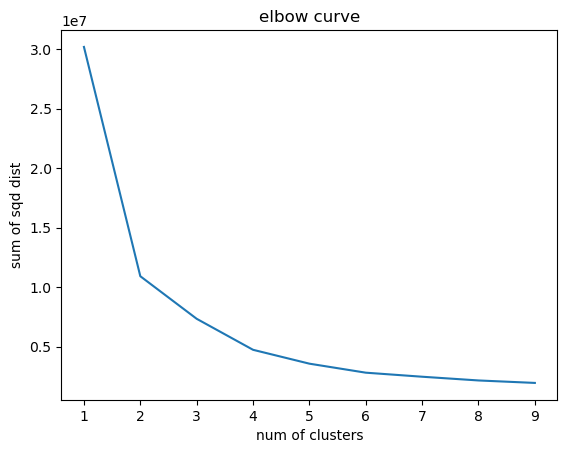

In [7]:
plt.plot(range(1,10),wcss)
plt.title('elbow curve')
plt.xlabel('num of clusters')
plt.ylabel('sum of sqd dist')
plt.show()

In [8]:
model=KMeans(init='k-means++',n_clusters=3)
model1=model.fit(a)

C:\Users\25472\anaconda3\envs\base2\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [9]:
clus_centers=pd.DataFrame(model1.cluster_centers_)
clus_centers.columns=a.columns
clus_centers

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,93.259459,0.571529,8.154054e+00,10.786000,0.037838,0.539460,6.196546,69.645946,3.893245,4.291892,332.335135,18.157838,372.872486,12.192919,22.266486
1,425.000000,12.299162,3.019807e-14,18.451825,0.058394,0.670102,6.006212,89.967883,2.054470,23.270073,667.642336,20.196350,291.039051,18.674526,16.272263
2,286.918478,0.205027,2.305163e+01,6.042935,0.108696,0.484085,6.580505,51.569565,4.992276,4.619565,291.407609,17.458696,389.257065,8.632337,27.461957


In [10]:
model1.inertia_

7340084.841133405

In [11]:
cluster=pd.DataFrame(model1.labels_)
cluster.columns=["cluster"]
a1=pd.concat([a,cluster],axis=1)

In [12]:
a1.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,cluster
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [13]:
b=model1.predict(a)

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(b,cluster))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       184

    accuracy                           1.00       506
   macro avg       1.00      1.00      1.00       506
weighted avg       1.00      1.00      1.00       506

